# Problem Identification

--------

Topic: Analyzing Patterns to Guide Company's A Restructuring Process.

Background: While COVID restrictions are easing out. Company A is in dire need of restructuring. Prior to COVID, they had overhire a bunch of new talents and in order to cut costs, they hire you as their data analyst to suggest how to proceed, whether they should merge or eliminate departments or provide layoffs. They give you a dataset of their current employees and it's your job to provide insight and make decision on who or what needs to be downsized. 


**SMART**
- Specific: Provide insight on who or what department needs to be downsized to cut costs.
- Measurable: Cut costs by 35% and boost profit margins.
- Achievable: Merge or eliminate unnecessary depatments. Layoff 20% of workforce.
- Relevant: Make hard decisions to navigate through this current Tech winter. Increase shareholder value.
- Time-Based: Provide report on cost cutting measures within a month.

Problem Statement: Company A need to implement cost cutting strategies as their profit margins are down and their shareholders are not happy. The goal is to downsize the surplus of new talent and eliminate or merge high cost departments without negatively affecting efficiency and boost profit margins.

Problem elaboration (5W + 1H):

- What is the average salary for the employees?
- Is there a gender pay gap?
- Who takes the most leaves?
- How does position level between men and women affect salary?
- Which department has the lowest performance rating?
- How are performance ratings as employees gets older?

# Data Loading

--------

## Loading and exploring data

In [680]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data reference source: https://www.kaggle.com/datasets/krishujeniya/salary-prediction-of-data-professions

In [681]:
# Read the source file
df = pd.read_csv('Salary Prediction of Data Professions.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [682]:
# Show summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [683]:
# Show Number of Unique Values Each Column
df.nunique()

FIRST NAME          2367
LAST NAME           2475
SEX                    2
DOJ                  967
CURRENT DATE           1
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                4
PAST EXP              21
dtype: int64

In [684]:
# Check total number of duplicates
df.duplicated().sum()

161

In [685]:
# Count missing values in each column
df.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

# Data Cleaning

---------

First, we'll remove irrelevant columns such as first names, last names, and the current date since they are not useful for further analysis. Next, we'll handle missing values by removing them and reformat relevant columns to their appropriate format. I'll also rename 'DOJ' to 'Date of Joining' to make it clearer and remove duplicates.

In [686]:
# Rename Column
df.rename(columns = {'DOJ' : 'DATE OF JOINING'}, inplace = True)

In [687]:
# Drop Columns
df.drop(columns=['FIRST NAME', 'LAST NAME', 'CURRENT DATE', 'LEAVES REMAINING'], inplace = True)

In [688]:
#remove missing values
df.dropna(inplace = True)

In [689]:
# Convert column to DateTime
df['DATE OF JOINING'] = pd.to_datetime(df['DATE OF JOINING'], format='%m-%d-%Y')


In [690]:
# Display data types of each column
df.dtypes

SEX                        object
DATE OF JOINING    datetime64[ns]
DESIGNATION                object
AGE                       float64
SALARY                      int64
UNIT                       object
LEAVES USED               float64
RATINGS                   float64
PAST EXP                    int64
dtype: object

In [691]:
# Count total missing values in dataframe
df.isna().sum().sum()

0

In [692]:
# Remove all duplicates
df.drop_duplicates(inplace= True)

In [693]:
# Check total number of duplicates
df.duplicated().sum()

0

In [694]:
# Shows DataFrame
df

,SEX,DATE OF JOINING,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP
0,F,2014-05-18,Analyst,21.0,44570,Finance,24.0,2.0,0
2,F,2014-07-28,Analyst,21.0,40955,Finance,23.0,3.0,0
3,F,2013-04-03,Analyst,22.0,45550,IT,22.0,3.0,0
5,F,2013-02-19,Analyst,22.0,48736,Marketing,20.0,4.0,0
6,M,2013-09-02,Analyst,22.0,40339,Marketing,19.0,5.0,0
...,...,...,...,...,...,...,...,...,...
2634,F,2011-06-28,Senior Manager,36.0,185977,Management,15.0,5.0,10
2635,F,2014-01-14,Analyst,23.0,45758,IT,17.0,2.0,0
2636,F,2014-01-23,Analyst,21.0,47315,Web,29.0,5.0,0
2637,F,2014-03-17,Analyst,24.0,45172,Web,23.0,3.0,1


In [695]:
df.nunique()

SEX                   2
DATE OF JOINING     966
DESIGNATION           6
AGE                  25
SALARY             2301
UNIT                  6
LEAVES USED          16
RATINGS               4
PAST EXP             21
dtype: int64

# Analysis and Calculations

------------

## Statistic Descriptive Analysis

### Measurement of Central Tendency 

In [696]:
# Checking the average, median, and mode values of salary
print('Salary in Average:',df['SALARY'].mean())
print('Median of Salary:',df['SALARY'].median())
print('Mode of Salary:',df['SALARY'].mode().values[0])

Salary in Average: 58040.92478770724
Median of Salary: 46734.0
Mode of Salary: 40403


### Measurement of Dispersion

In [697]:
# Checking the range of salary
range = df['SALARY'].max() - df['SALARY'].min()
print('Range of salary:',range)

# Checking the variance of salary
variance = df['SALARY'].var()
print('Variance of salary:',variance)

# Checking the standard deviation of salary
std = df['SALARY'].std()
print('Standard Deviation of salary:',std)



Range of salary: 348111
Variance of salary: 1351055139.8729825
Standard Deviation of salary: 36756.701972197974


In [698]:
# Finding the Inter-Quartile Range of Salary
q1 = df['SALARY'].quantile(0.25)
q2 = df['SALARY'].quantile(0.5)
q3 = df['SALARY'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 43414.0
Q2: 46734.0
Q3: 50266.0
Interquartile Range (IQR): 6852.0


Next we need to do normality test to figure out the skewness.

In [699]:
# Checking the skewness of salary
print(f"Skewness: {df['SALARY'].skew()}")

# Checking the kurtosis of salary
print(f"Kurtosis: {df['SALARY'].kurtosis()}")

Skewness: 4.479779147468083
Kurtosis: 25.049216345520733


Skewness of Salary is greater than 1 which implies the distribution is positive and highly skewed. This could be due that only a few employees receive a large salary while majority receve few. <br>
Kurtosis value is greater than 0 indicating that the data has more outliers or extreme values than a normal  distribution. 

### Outlier and Extreme Value Analysis

Now we need to detect outliers. We know that the value is highly skewed therefore we will apply Tukey's Rule.

In [700]:
# Tukey's Rule - Salary
up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 60544.00
Lower Boundary: 33136.00


In [701]:
# Percentage of Outliers
outlier = df['SALARY'][(df['SALARY']<low_bound) | (df['SALARY']>up_bound)]
no_outlier = df['SALARY'][(df['SALARY']>=low_bound) & (df['SALARY']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["SALARY"]):.2f}%%')

Percentage of outliers: 18.68%%


<Axes: >

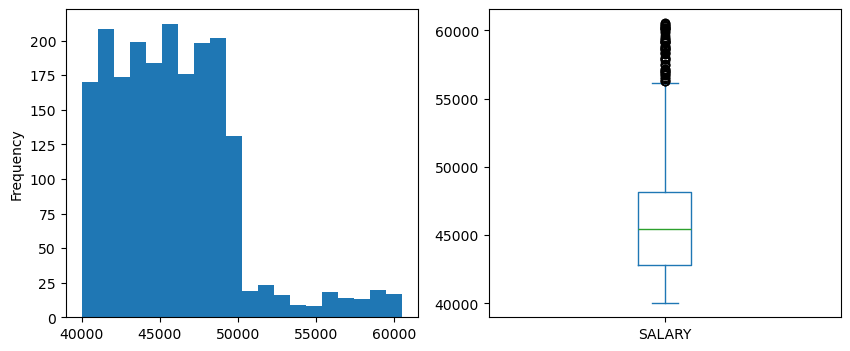

In [702]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

Majority of people earn between $40.000 to $50.000. There is a noticable drop in frequency for salaries above $50.000 indicating less people earn in that range and above. <br>
The dots above the upper bound in the boxplot represent outliers, which are salaries that are significantly higher than the rest of the data. These outliers are above $50,000. 

### Correlation Analysis

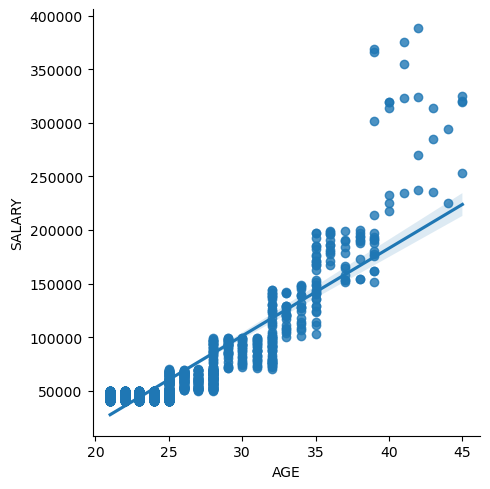

In [715]:
sns.lmplot(data=df,x='AGE', y='SALARY')

There is a positive correlation between Salary and Age suggesting that the older you are, the higher the salary.

In [704]:
# Import stats from scipy
from scipy import stats


# Checking Pearson , Spearman , and Kendall
corr_r, pval_p = stats.pearsonr(df['SALARY'], df['AGE'])
corr_rho, pval_s = stats.spearmanr(df['SALARY'], df['AGE'])
corr_tau, pval_k = stats.kendalltau(df['SALARY'], df['AGE'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: 0.87, p-value: 0.0
rho-correlation: 0.58, p-value: 3.217315629413261e-222
tau-correlation: 0.45, p-value: 7.345627540358109e-216


All three correlation (Pearson, Spearman, and Kendall) indicate a positive relationship between salary and age.
The strongest relationship is indicated by the Pearson correlation, which measures linear relationships.
The statistical significance of all three correlations (p-values less than 0.05) suggests that age has a factor in determining salary.


## Statistic Inferential Analysis

### Hypothesis Test

Is there a pay gap between 2 genders? Let's find out.

H0: There is no significant difference in salaries between male and female data professionals. <br>
H1: There is a significant difference in salaries between male and female data professionals. <br>

To test whether there is significant differences of accross different departments we will perform the Two Sample Independent Test.

In [705]:
# Salaries by gender
female = df[df['SEX'] == 'F']['SALARY']
male = df[df['SEX'] == 'M']['SALARY']

# Mean Salaries by gender
female_mean = female.mean()
male_mean = male.mean()


print(f'Average Salary for Females is {female_mean}')
print(f'Average Salary for Males is {male_mean}')

Average Salary for Females is 58966.99523052464
Average Salary for Males is 57082.07983539095


In [706]:
female

0        44570
2        40955
3        45550
5        48736
8        63478
         ...  
2633     40277
2634    185977
2635     45758
2636     47315
2637     45172
Name: SALARY, Length: 1258, dtype: int64

In [707]:
t_stat, p_val = stats.ttest_ind(female , male)
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 1.2750484463855918
P-value: 0.20241196586120047


The p-value is greater than the significance level of 0.05 , thus we fail to reject the null hypothesis. Therefore, our result finds that there is no significant difference in salaries between male and female data professionals.

## Data Visualization

In [708]:
import plotly.express as px

### Average of Salary by Designation

In [709]:
# Plotting bar chart
fig = px.histogram(df, x="DESIGNATION", y="SALARY",
             color='SEX', barmode='group', histfunc='avg',
             height=400)
fig.show()

Here, we aim to examine salary discrepancies between designations categorized by gender. The purpose is to validate how designations affect salaries and see if we can balance out extreme values. This is a pre-analysis to see if there is correlation between designation and performance ratings.

### Average Performance Ratings by Age.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='AGE', ylabel='RATINGS'>

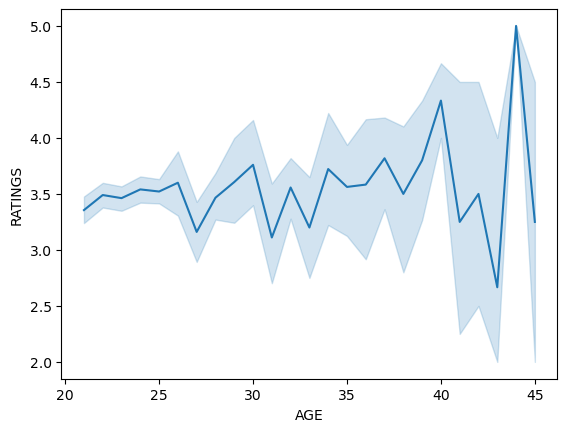

In [710]:
# Line Chart

sns.lineplot(df, x = 'AGE' , y = 'RATINGS')

This line chart specifies the average rating between age groups. As seen here ratings are somewhat consistent from ages 20 to 35 and begins to be volatile after 40. This could happen because the majority of the labor force are young people.

### Most Leaves Used by Age

In [711]:
fig = px.histogram(df, x="AGE", y="LEAVES USED",
             color='SEX', barmode='group',
             height=400)
fig.show()

We want to inspect which age group takes the most leaves. As seen here, those who are in their 20s tend to take more leaves which could hinder productivity.

### Performance Rating by Unit / Department

In [712]:
df_grouped = df.groupby('UNIT')['RATINGS'].sum().reset_index()
df_grouped = df_grouped.sort_values('RATINGS', ascending=False)

fig = px.bar(df_grouped, x='RATINGS', y='UNIT',
             title='Total Performance Rating by Unit / Department',
             color='UNIT',
             color_continuous_scale='Magenta')
fig.update_layout(title_x = 0.5)
fig.show()

In [713]:
df.to_csv('salary_cleaned.csv', index = False)

Here we compare which department has the lowest performance rating. This is vital to figure out which departments require extreme restructuring.

# Conclusion

Our analysis reveals significant salary disparities within Company A, with a few employees earning much higher than the majority, who make between $40,000 to $50,000. This skewed distribution is linked to seniority and age. Additionally, there is little to no gender wage gap. Performance ratings are consistent between ages 25 to 35 but become volatile after 40, likely due to fewer older employees. Employees under 25 use the most leave, and the Web department shows the lowest performance ratings.

To address these issues and cut costs, we recommend restructuring. Adjusting the salary structure by implementing performance-based bonuses can create more equitable compensation. Reviewing senior positions will ensure their pay aligns with their contributions.

Cost-cutting measures should include eliminating the Web department and outsource in order to reduce costs. This will streamline operations and improve performance. In essence, we aim to reduce low performing labor by% 3 to 6% in each department, effectively reducing 20% overall.

Additionally. since most of our labour force are younger employees we should downsize this segment by cutting the lowest performance workers in order to balance our age diversity. This way, management level positions can also be restructured to create a more efficient and lean leadership team. This could involve combining roles or departments under fewer managers to enhance oversight and reduce overhead costs.

These strategies will balance and streamline Company A's structure, improve performance, and reduce financial concerns.

Tableu Dashboard Link: <br> https://public.tableau.com/views/david-milestone_1_dashboard/VisualData?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link